## Importing libraries

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing dataset

In [161]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [162]:
df.shape

(30641, 15)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)




## Using "describe()" found that
> Least marks in MATH = 0, READING_SCORE = 10, WRITING_SCORE = 4 for out of 100

In [164]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


## Checking for NULL values.

In [165]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Dropping Unnamed column

In [166]:
df.drop('Unnamed: 0', axis= 1, inplace = True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Changing column " WklyStudyHours " value " 05-Oct " >> " 5-10 "

In [167]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace('05-Oct','5-10')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Gender Distribution

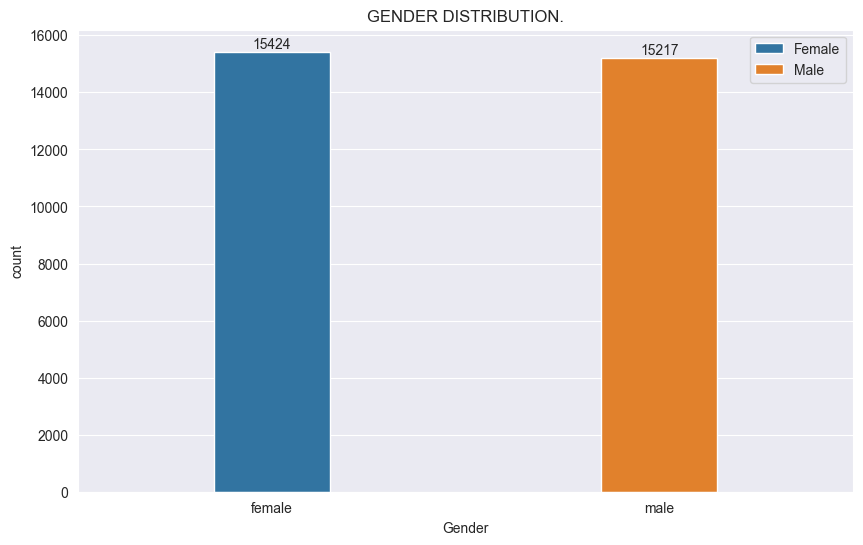

In [168]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')

ax = sns.countplot(x='Gender', data=df, width = 0.3, alpha = 1,hue='Gender' )

# BAR LABELS.
for container in ax.containers:
    ax.bar_label(container)

plt.title('GENDER DISTRIBUTION.')
plt.legend(['Female','Male'])

plt.show()

### From the above plot it was analysed that the number of FEMALES are more than the MALES.

## PARENT EDUCATION DISTRIBUTION

In [169]:
group_parent = df.groupby(by = 'ParentEduc').agg({'MathScore':"mean", 'ReadingScore': "mean", 'WritingScore' : 'mean'})
group_parent

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


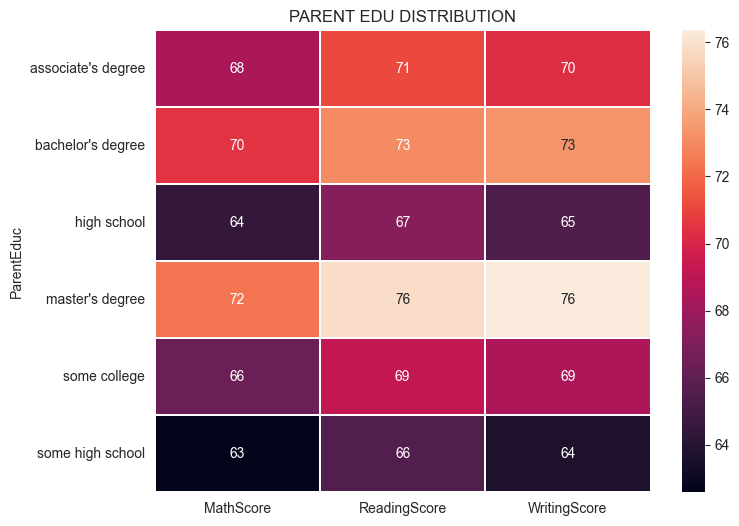

In [176]:
plt.figure(figsize = (8,6))

sns.heatmap(data = group_parent, linewidth = 0.1, linecolor = 'white', annot = True)

plt.title("PARENT EDU DISTRIBUTION")
plt.show()

#### From the above analysis the parent education as effect on the scores of students
- LIke students who has parents with good degree or eduction are scoring well in all of three

## PARENT MARITAL STATUS IMPACT

In [ ]:
parent_marital_status = df.groupby(by = 'ParentEduc').agg({'MathScore':"mean", 'ReadingScore': "mean", 'WritingScore' : 'mean'})
parent_marital_status

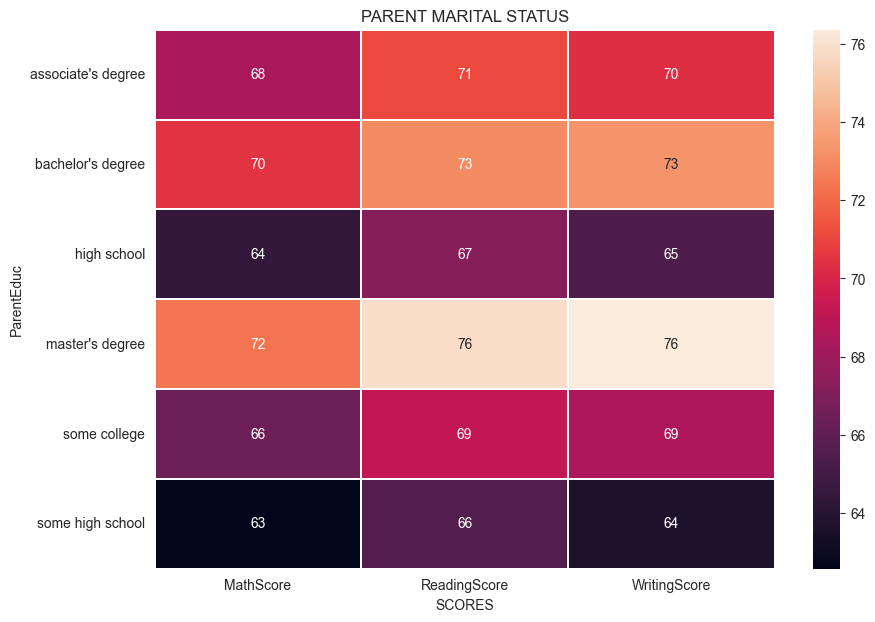

In [177]:
plt.figure(figsize = (10,7))

sns.heatmap(data = parent_marital_status, linewidth = 0.2, linecolor = 'white',annot =True)

plt.title("PARENT MARITAL STATUS")
plt.xlabel("SCORES")

plt.show()

#### From the above chart analysis the impact of parent marital status t have no/negligible impact on the student performance.

## ETHNIC GROUP DISTRIBUTION

In [ ]:
group_A = df.loc[(df['EthnicGroup'] == 'group A')].count()
group_B = df.loc[(df['EthnicGroup'] == 'group B')].count()
group_C = df.loc[(df['EthnicGroup'] == 'group C')].count()
group_D = df.loc[(df['EthnicGroup'] == 'group D')].count()
group_E = df.loc[(df['EthnicGroup'] == 'group E')].count()


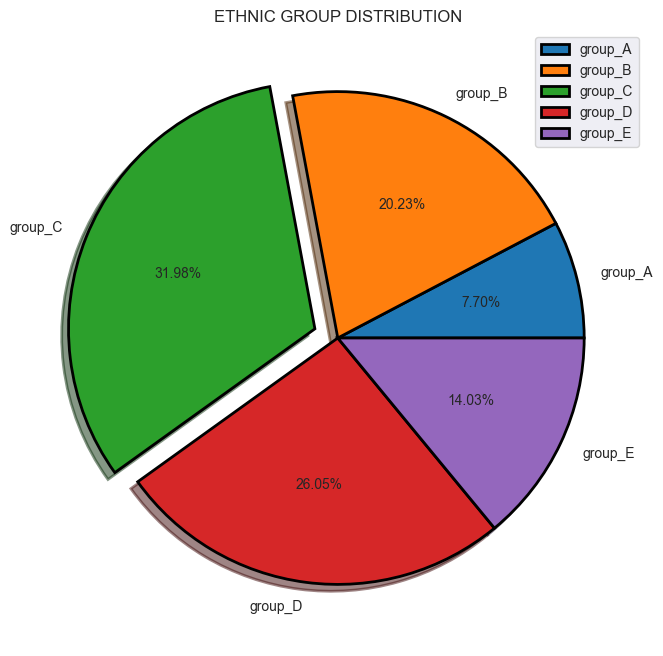

In [178]:
grp_list = [group_A['EthnicGroup'],group_B['EthnicGroup'],group_C['EthnicGroup'],group_D['EthnicGroup'],group_E['EthnicGroup'] ]
l = ['group_A', 'group_B', 'group_C', 'group_D', 'group_E']

plt.figure(figsize = (8,8))


plt.pie(x = grp_list, labels = l, autopct = "%1.2f%%", shadow = True, explode = [0,0,0.1,0,0], wedgeprops = {'edgecolor': 'black',
                                                                                                             'linewidth': 2,
                                                                                                             'antialiased': True})

plt.title("ETHNIC GROUP DISTRIBUTION")
plt.legend()

plt.show()

#### From the above pie chart it was concluded that GROUP C has the more number of students.

## Score based on SPORTS

In [ ]:
grp_sports = df.groupby(by = 'PracticeSport').agg({'MathScore':"mean", 'ReadingScore': "mean", 'WritingScore' : 'mean'})
grp_sports

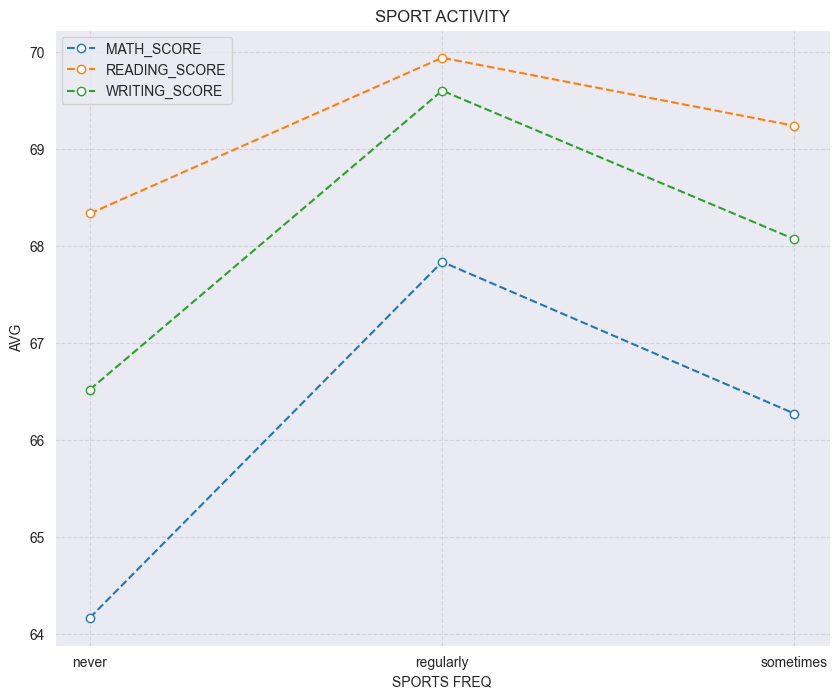

In [179]:
plt.figure(figsize = (10,8))

plt.plot(grp_sports,linestyle= "--",marker = 'o', markerfacecolor = 'white' )

plt.grid(True, linestyle = '--', color = 'grey',alpha = 0.2)

plt.legend(['MATH_SCORE','READING_SCORE','WRITING_SCORE'])
plt.xlabel('SPORTS FREQ')
plt.ylabel('AVG')
plt.title('SPORT ACTIVITY')

plt.show()

#### The chart shows that a little differnce in performance regarding playing of games

In [186]:
grp_study = df.groupby(by = 'WklyStudyHours').agg({'MathScore':"mean", 'ReadingScore': "mean", 'WritingScore' : 'mean'}).sort_values('WklyStudyHours', ascending = False)
grp_study

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
> 10,68.696655,70.365436,69.777778
< 5,64.580359,68.176135,67.090192
5 - 10,66.870491,69.660532,68.636280


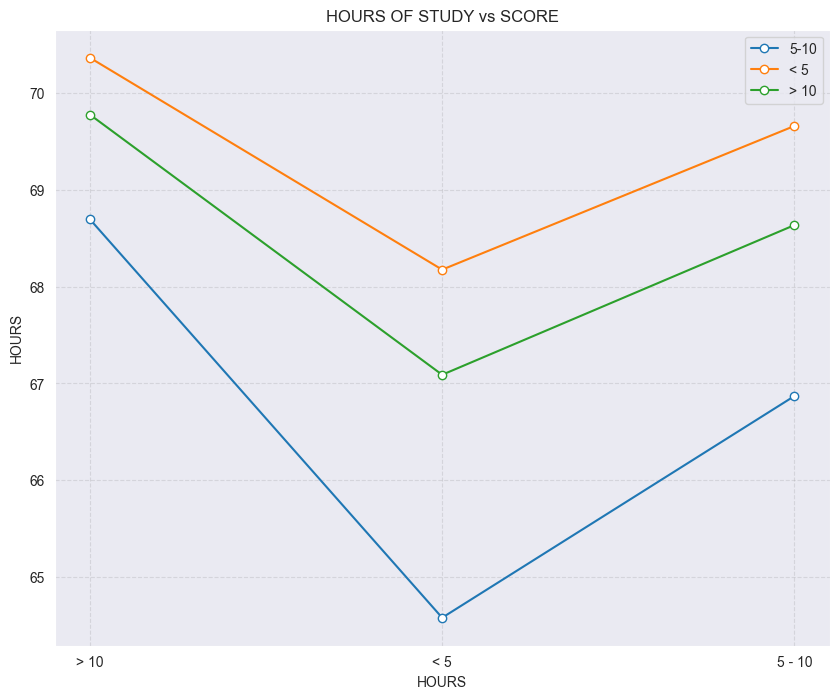

In [191]:
plt.figure(figsize = (10,8))

plt.plot(grp_study,linestyle= "-",marker = 'o', markerfacecolor = 'white' )

plt.grid(True, linestyle = '--', color = 'grey',alpha = 0.2)

plt.legend(['5-10','< 5','> 10'])
plt.xlabel('HOURS')
plt.ylabel('HOURS')
plt.title('HOURS OF STUDY vs SCORE')

plt.show()

#### Has usual who studies less time scored less marks.